### <img src='./fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>

<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Introducción al Análisis Estadístico con Lenguajes de Programación para Machine Learning (IAELPML). 2023-2024.
</h1>


<h1 style='font-family: Optima;color:#ecac00'>
Final Group Proyect
<a class="tocSkip">    
</h1>  
   

<h1 style='font-family: Optima;color:red'>
Due Date: 2023-11-13
<a class="tocSkip">    
</h1>  

    
    

# Group members: 
### Álvaro Ezquerro Pérez (alvaroezquerro@alu.comillas.edu)
### Celia Quiles Alemañ (202315604@alu.comillas.edu)
### María Calvo de Mora Román (202320059@alu.comillas.edu)

In [1]:
# Standard Data Science Libraries Import

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scp
import scipy.stats as stats
#import statsmodels.api as sm
import matplotlib
from sklearn.linear_model import LinearRegression

## Acerca del conjunto de datos

El conjunto de datos `Medicalpreimum.csv` ofrece una visión detallada de la información relacionada con la salud de aproximadamente 1000 clientes de una compañía de seguros médicos. Los datos han sido proporcionados de manera voluntaria por los propios clientes, y se han recopilado con el propósito de  estimar el coste anual de cobertura médica esperado para los clientes según ciertas características de su salud.

La variable `PremiumPrice` está expresada en rupias Indias (₹), por lo que se debe considerar que 1€ equivale a 88,25₹

## Cargar el conjunto de datos en un DataFrame

Se carga el conjunto de datos en un DataFrame de pandas llamado `df`. Tras acceder al conjunto de datos con un editor de texto, se observa que las variables de una misma fila están separadas por coma y que la línea 0 corresponde a la línea de cabera (header) en la que aparecen los nombres de las columnas.

In [2]:
df = pd.read_csv('./Medicalpremium.csv', sep = ',', header = 0)

In [3]:
df.head() # Se accede a las 5 primeras observaciones de lprima

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


## Accediendo a información básica de la tabla

A continuación:

+ Se accede a las dimensiones del DataFrame (obteniendo una tupla que representa (fila, columna).
+ Se accede a los nombres de las variables/columnas del DataFrame.
+ Se obtiene una serie de datos estádisticos descriptivos del Dataframe mediante el método describe(). De cada columna/variable obtengo el número de observaciones, media, desviación estándar, máximo, mínimo y percentiles.
+ Con el método info() obtengo un breve resumen del DataFrame. Incluye las observaciones no nulas y el tipo de datos de cada columna.

In [4]:
print('Estas son las dimensiones (filas/observaciones y columnas/variables) del conjunto de datos: \n',df.shape, '\n')
print('Estas son las columnas/variables del conjunto de datos: \n', df.columns, '\n')
print('Estos son algunos datos relevantes del conjunto de datos: \n',df.describe(), '\n')
print('Información sobre los datos pertenecientes a cada columna: \n')
df.info()

Estas son las dimensiones (filas/observaciones y columnas/variables) del conjunto de datos: 
 (986, 11) 

Estas son las columnas/variables del conjunto de datos: 
 Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object') 

Estos son algunos datos relevantes del conjunto de datos: 
               Age    Diabetes  BloodPressureProblems  AnyTransplants  \
count  986.000000  986.000000             986.000000      986.000000   
mean    41.745436    0.419878               0.468560        0.055781   
std     13.963371    0.493789               0.499264        0.229615   
min     18.000000    0.000000               0.000000        0.000000   
25%     30.000000    0.000000               0.000000        0.000000   
50%     42.000000    0.000000               0.000000        0.000000   
75%     53.000000    1.000000      

Tras este pequeño análisis inicial se pueden comentar varios aspectos:
+ El conjunto de datos cuenta con un total de 11 variables y 986 observaciones.
+ Las columnas del DataFrame contienen información relevante acerca de la salud de cerca de 1000 pacientes (específicamente 986 pacientes) así como el precio anual de cobertura médica (variable `PremiumPrice`). Más específicamente se observa que se recoge información sanitaria sobre ciertos factores y antecedentes médicos tales como si el paciente padece diabetes (`Diabetes`), la presencia de problemas de presión sanguínea(`BloodPreassureProblems`) o el historial de cáncer familiar por paciente (`HistoryOfCancerInFamily`), entre otros.
+ Los métodos `.describe()` y `.info()` nos proporcionan así mismo cierta información de interés:
    + Por ejemplo, la edad media de los pacientes resgistrados es de 42 años, el 22% de ellos tiene alergias conocidas, y el precio medio de la prima es de 24300 euros aproximadamente.
    + Específicamente podemos ver que no existe la presencia de datos nulos. Sin embargo, y para asegurarnos de que dicha inexistencia de datos que faltan es nula, se procede a hacer una comprobación explícita.

## Comprobando la presencia de datos que faltan

+ En primer lugar, para obtener las variables con datos que faltan (con valor NaN) se hace uso del método `isnull()`. Este método detecta los valores que faltan, devolviendo un booleano del mismo tamaño del DataFrame que indica si los valores son NaN. Si una observación de cierta variable tiene valor NaN devuelve un True y en caso contrario False. Para obtener el número de observaciones con NaN que contiene cada variable se utiliza el método `sum()`, el cual suma 1 por cada fila a True del booleano devuelto por isnull(`.
+ Para obtener el número de las filas con valores NaN se hace uso de `isnull().any(axis=1)`, lo cual devuelve una Serie de booleanos. Tendrá valor True si al menos uno de los valores en cada fila (any(axis=1)) es True. Posteriormente se filtra el data set original `df` basado en la máscara booleana creada por isnull().any(axis=1), seleccionado únicamente las filas de `df` donde al menos una columna tiene valor NaN. Por último, se obtiene el índice de dichas filas con index.

In [5]:
print('Número de observaciones NaN por variable: \n',df.isnull().sum()) # variables con NaN
print('')
print('Indices de las filas con al menos un valor NaN: \n', df[df.isnull().any(axis=1)].index) # Filas con NaN

Número de observaciones NaN por variable: 
 Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

Indices de las filas con al menos un valor NaN: 
 Index([], dtype='int64')


Por tanto, se observa que efectivamente no existe ninguna observación en todo el conjunto de datos que contenga algún valor NaN en alguna de sus columnas. Por tanto, no es necesario hacer ninguna limpieza de dichos datos NaN y se continuará el análisis con el DataFrame original contieniendo un total de 986 observaciones y 11 columnas.

## Convirtiendo tipos de variables 
Tal y como se vió en clase, existen principalmente 2 tipos de variables: cuantitativas (discretas y continuas) y cualitativas o factores. Es importante, dedicar un tiempo a estudiar el tipo de variables y cambiar, si fuese necesario, la asignación de tipo que hace Python para que así nuestro análisis no pierda información útil y pueda beneficiarse de los métodos estadísticos. Para ello, se debe considerar si hay variables que deben tratarse como cualitativas, es decir, si se trata de etiquetas que agrupan las observaciones en clases y caceren de sentido matemático. De las 11 variables que tiene el DataFrame, el método info ha indicado anteriormente que Pyhton considera a todas como numéricas (`int`), pero algunas de ellas deberían ser consideradas como factores:
+ La variable `Diabetes` es considerada por Python como tipo entero (`int64`) pero realmente clasifica en paciente diagnosticado con diabetes/paciente no diagnosticado con diabetes.
+ La variable `BloodPressureProblems` es considerada por Python como tipo continua (`int64`) pero realmente clasifica en presencia o no de problemas de presión sanguínea.
+ La variable `AnyTransplants` es considerada por Python como tipo entero (`int64`) pero realmente clasifica en pacientes que han recibido transplante/pacientes no transplantados.
+ La variable `AnyChronicDiseases` es considerada por Python como tipo ontinua (`int64`) pero realmente clasifica en pacientes que presentan una enfermedad crónica o no.
+ La variable `KnownAllergies` es considerada por Python como tipo entero (`int64`) pero realmente clasifica en pacientes cuyas alergias son conocidas o no.
+ La variable `HistoryOfCancerInFamily` es considerada por Python como tipo entero (`int64`) pero realmente clasifica en pacientes con/sin antecende familiar cancerígeno.

Por tanto, para convertir de tipo de variable a factor se hace uso del método astype().

In [6]:
df = df.astype({'Diabetes':'category',
                'BloodPressureProblems':'category',
                'AnyTransplants':'category',
                'AnyChronicDiseases':'category',
                'KnownAllergies':'category',
                'HistoryOfCancerInFamily':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      986 non-null    int64   
 1   Diabetes                 986 non-null    category
 2   BloodPressureProblems    986 non-null    category
 3   AnyTransplants           986 non-null    category
 4   AnyChronicDiseases       986 non-null    category
 5   Height                   986 non-null    int64   
 6   Weight                   986 non-null    int64   
 7   KnownAllergies           986 non-null    category
 8   HistoryOfCancerInFamily  986 non-null    category
 9   NumberOfMajorSurgeries   986 non-null    int64   
 10  PremiumPrice             986 non-null    int64   
dtypes: category(6), int64(5)
memory usage: 45.1 KB


Al acceder a los tipos de datos con el método `info`, observamos que efectivamente, las 6 variables que hemos considerado como factores han cambiado su tipo a categoría.

## Análisis exploratorio de tipos de variables
Con el obejtivo de cubrir todas las variables, se procede a realizar el análisis exploratorio para todas y cada una de las variables del conjunto de datos:
+ `Age`\-> variable numérica tipo entera y discreta (`int64`)
+ `Diabetes` \-> variable cualitativa tipo factor (`category`)
+ `AnyTransplants` \-> variable cualitativa tipo factor (`category`)
+ `AnyChronicDiseases` \-> variable cualitativa tipo factor (`category`)
+ `Height` \-> variable numérica tipo entera y discreta (`int64`)
+ `Weight` \-> variable numérica tipo entera y discreta (`int64`)
+ `KnownAllergies` \-> variable cualitativa tipo factor (`category`)
+ `HistoryOfCancerInFamily` \-> variable cualitativa tipo factor (`category`)
+ `NumberOfMajorSurgeries` \-> variable numérica tipo entera y discreta (`int64`)
+ `currentSmoker` \-> variable cualitativa tipo factor (`category`)
+ `PremiumPrice` \-> variable numérica tipo continua (`float64`)

### Variable `Age` (numérica discreta)
##### Resumen numérico básico
+ En primer lugar, para obtener un resumen numérico básico que contenga la media, la desviación estándar, el máximo, el mínimo y los percentiles de una variable numérica (en este caso "age") se puede hacer uso del método describe().
+ Para obtener la mediana, se puede hacer uso del método median().
+ Para calcular los cuartiles, se puede hacer uso de la función Numpy quantile, pasándole una lista de los valores porcentuales que queremos obtener

In [7]:
print(df.Age.describe()) # Acceder a datos numéricos básicos
print("La mediana es: ",np.median(df.Age)) # Mediana 
print("Los cuatiles (primer, segundo y tercer) son: ",np.quantile(df.Age,[0.25,0.50,0.75])) # Cuartiles
print("La desviación típica es: ",np.std(df.Age)) # Desviación típica 

count    986.000000
mean      41.745436
std       13.963371
min       18.000000
25%       30.000000
50%       42.000000
75%       53.000000
max       66.000000
Name: Age, dtype: float64
La mediana es:  42.0
Los cuatiles (primer, segundo y tercer) son:  [30. 42. 53.]
La desviación típica es:  13.956288776470847


Efectivamente observamos como este pequeño resumen aporta una información coherente. En primer lugar, como se comentó anteriormente, el método describe() devuelve un total de 986 filas, lo cual es coherente tras no haber eliminado ninguna fila ante la inexistencia de valores NaN. Además, se observa como la mediana devuelta por el método describe() (42.0) coincide, como era de esperar con el segundo cuartil (42), pues dicho cuartil es simplemente otro nombre para referirse a la mediana. Por otro lado, hemos podido también acceder a que la variable "Age" tiene un recorrido de [18,66]. Finalmente, comprobamos que la desviación típica devuelta por el método describe() coincide con la calculada a través de NumPy.

##### Gráficas
La gráfica básica y recomendada para una variable numérica discreta es el gráfico de barras.

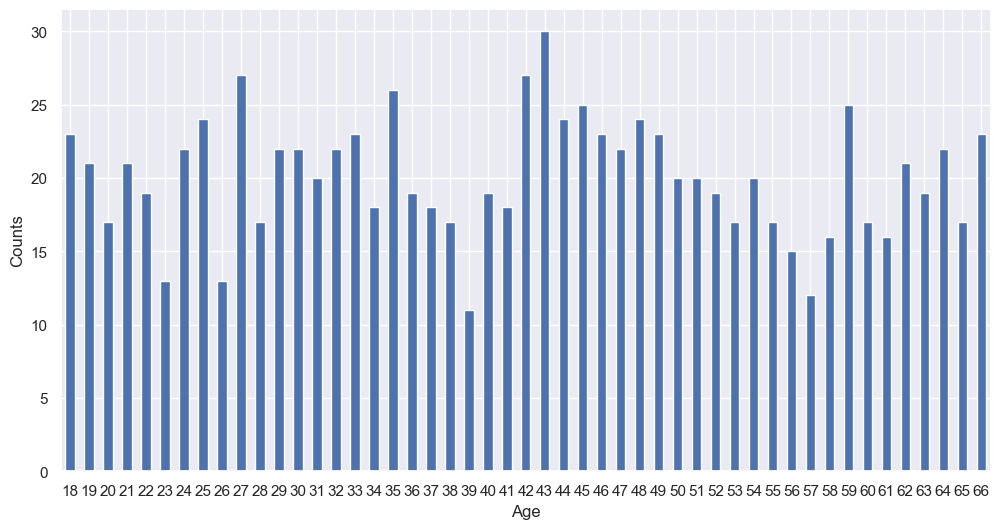

In [8]:
sns.set() 
plt.figure(figsize=(12, 6)) 
AbsFreq_Age = df['Age'].value_counts().sort_index() 
AbsFreq_Age
plot = AbsFreq_Age.plot.bar(xlabel='Age',ylabel='Counts',rot=0)
plt.show()

Tras obtener la gráfica, observamos cómo nos da información acerca de la distribución de los datos. En particular, nos proporciona un resumen visual de las observaciones de la variable edad. Así, vemos como exite una enorme variedad de edades y como los datos estan bastante uniformemente distribuidos a lo largo del recorrido de la variable. Sin emabrgo, podríamos determinar que la mayoría de observaciones se encuentran entorno a 27, 42 y 43 años. Además, cuando calcumos los percentiles, obtuvimos un tercer percentil de 53, lo cual tras representar la grafica, se puede observar aproximadamente de manera visual, pues a partir del 53 los datos empiezan a caer levemente teniendo menor densidad de datos para edades mayores que 53.

Es importante mencionar, que la variable `Age`, aunque es considerada como variable discreta, supone un caso de ejemplo en el que la barrera entre variables discretas y continuas se vuelve borrosa. Es decir, la variable "age" aunque sea discreta, toma una gran variedad de valores distintos, por lo que lo más recomendable seria discretizarla en intervalos o bins. Sin embargo, esto se hará al final de la exploración de esta variable.

Como aproximación para visualizar la gran dispersión de los datos y la enorme cantidad de valores distintos que toma la mencionada variable `Age` se puede realizar una representación mediante un gráfico denominado *stripplot*. Estos gráficos muestran en el eje horizontal los puntos individuales que toma la variable y permiten ver muy visualmente la forma en la que se dispersan los datos

[]

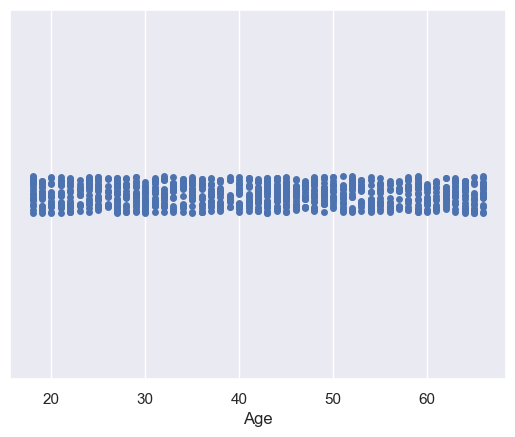

In [9]:
stripplot = sns.stripplot(data=df['Age'], jitter=0.05, orient='h')
stripplot.set()

Tal y como muestra el gráfico superior, la variable `Age` toma valores que están claramente repartidos uniformemente por todo el recorrido, de una forma casi perfectamente uniforme. Es decir, aparece una ciertas zonas con una menor densidad de datos en ciertos valores de la variable sin una tendencia clara.

En este sentido, otra forma de visualizar si existen datos leventeme distintos al resto o "atípicos" es mediante unos diagramas denominados *boxplots*.Estos gráficos además representan visualmente los percentiles de la variable estudiada.

<Axes: xlabel='Age'>

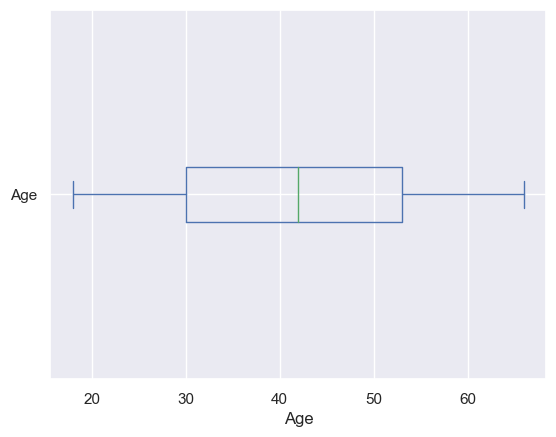

In [10]:
df['Age'].plot(kind='box', xlabel='Age', vert=False)

Como se puede observar en el gráfico superior, no existen valores atípicos. Es decir, aunque existan personas con edades levemente distintas a la tendencia habitual de esta muestra, es decir alrededor de la media (42) no se consideran como valores atípicos si no que entran dentro de de los valores no atípicos más extremos. Esto nos confirma la idea de que la variable `Age` supone un ejemplo perfecto de que la barrera entre variables discretas y continuas se vuelve borrosa. Por tanto, tal y como se comentó anteriormente, se procede a realizar una discretización de dicha variable, guardando el resultado en una nueva columna del DataFrame denominada `AgeGroup`

Específicamente, se procede a realizar una división de la variable `Age` en 5 intervalos de la ya existente columna "Age", se hace uso de la función cut the Pandas. Para ello, se epecifican los intervalos (bins) en los que se quiere dividir la variable (en este caso se han determinado 5 intervalos (0,20], (20,40], (40,60], (60,80],  (80,100]) para su discretización y se guarda el resultado en una nueva columna de tipo factor del DataFrame. 

In [11]:
df['AgeGroup'] = pd.cut(df['Age'], bins =[0, 20, 40, 60, 80, 100])
print(df.head())
print(df['AgeGroup'].head())

   Age Diabetes BloodPressureProblems AnyTransplants AnyChronicDiseases  \
0   45        0                     0              0                  0   
1   60        1                     0              0                  0   
2   36        1                     1              0                  0   
3   52        1                     1              0                  1   
4   38        0                     0              0                  1   

   Height  Weight KnownAllergies HistoryOfCancerInFamily  \
0     155      57              0                       0   
1     180      73              0                       0   
2     158      59              0                       0   
3     183      93              0                       0   
4     166      88              0                       0   

   NumberOfMajorSurgeries  PremiumPrice  AgeGroup  
0                       0         25000  (40, 60]  
1                       0         29000  (40, 60]  
2                       1       

Como se puede observar, el DataFrame `df` resultante tiene la nueva columna 'ageGroup' que contiene las categorías correspondientes para cada valor de "age".

Una vez discretizada la variable `Age` mediante la creación de  una nueva variable `AgeGorup`, se procede a hacer uso de una de las herramientas más útiles con variables discretas y factores: las tablas de frecuencias. Así, se pretende buscar cuántas observaciones hay por cada nivel de la variable `AgeGroup`, se procede a calcular la tabla de frequencias para esta variable de tipo factor (sus valores no son números si no etiquetas que corresponden los nombres de los intervalos). Tal y como se ha hecho anteriormente con las variables de tipo factor, la tabla de frequencias absolutas nos dará información del número de observaciones que hay por cada intervalo.

In [12]:
AbsFreq_AgeGroup = df['AgeGroup'].value_counts().sort_index()
RelFreq_AgeGroup = df['AgeGroup'].value_counts(normalize=True).sort_index()
freqTable = pd.DataFrame({'Frec_Absolutas':AbsFreq_AgeGroup, 
                          'Frec_Relativas':RelFreq_AgeGroup})
print('La tabla de frecuencias absolutas y relativas de la variable "AgeGroup" es: \n',freqTable)


La tabla de frecuencias absolutas y relativas de la variable "AgeGroup" es: 
            Frec_Absolutas  Frec_Relativas
AgeGroup                                 
(0, 20]                61        0.061866
(20, 40]              393        0.398580
(40, 60]              414        0.419878
(60, 80]              118        0.119675
(80, 100]               0        0.000000


Tal y como muestra la tabla de frequencias obtenida, el intervalo con mayor cantidad de observaciones es el tercer intervalo, correspondiente al grupo de edad entre (40,06]. Si recordamos los resultados obtenidos anteriormente al hacer el análisis exploratorio de la variable "Age", tiene sentido que el tercer intervalo contenga el mayor número de observaciones. Es decir, es coherente con lo obtenido anteriormente donde la media de la variable "Age" es 41,7 (contenido dicho tercer intervalo) y el 75% de los datos se encontraban desde 53 para abajo.

### Variable `Diabetes` (cualitativa/factor/categoría)
##### Tablas de frequencia
Con el objetivo de analizar una variable cualitativa tipo factor, específicamente la variable `Diabetes`, se procede a obtener sus tablas de frequencia absoluta y relativa, así como las tablas de frequencia acumuladas.

In [13]:
AbsFreq_diabetes = df['Diabetes'].value_counts().sort_index() 
RelFreq_diabetes = df['Diabetes'].value_counts(normalize=True).sort_index() 
freqTable = pd.DataFrame({'Frec_Absolutas':AbsFreq_diabetes, 
                          'Frec_Relativas':RelFreq_diabetes})
print("Tabla de frecuencias absolutas y relativas: \n",freqTable)


Tabla de frecuencias absolutas y relativas: 
           Frec_Absolutas  Frec_Relativas
Diabetes                                
0                    572        0.580122
1                    414        0.419878


Observando los resultados de las tablas de frequencias podemos afirmar que:
+ El número de no diabéticos es mayor que el de diabéticos. Las frequencias absolutas nos indican que en el total de observaciones hay 572 no diabéticos vs. 414 diabéticos. 
+ Además, las frequencias relativas nos especifican que dichas frequencias absolutas equivalen a que el 58% no son diabéticos, mientras que el 42% sí lo son. Es decir, que la probabilidad de que un paciente sea diabético entre 100 personas es del 42%.

##### Gráficas
Para obtener una representación gráfica de la variable cualitativa `Diabetes`, vamos a realizar un gráfico de barras

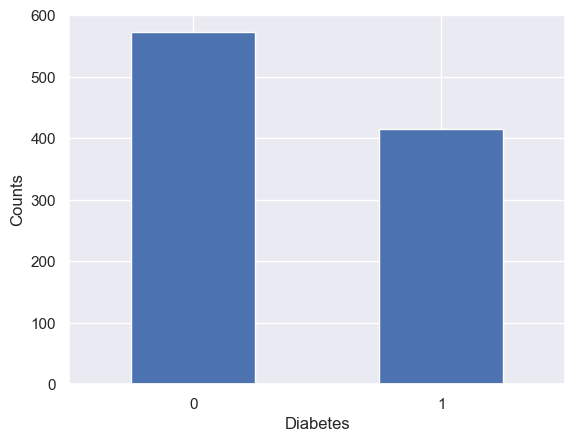

In [14]:
sns.set() 
plot = AbsFreq_diabetes.plot.bar(xlabel='Diabetes',ylabel='Counts', rot=0)

De nuevo, esta representación gráfica de las frequencias absolutas nos vuelve a confirmar lo que ya habíamos comentado antes. Es decir, que el número de no diabéticos es mayor que el de diabéticos, con una diferencia muy pequeña (158 observaciones) en comparación con la cantidad de observaciones de la tabla (986 observaciones).

### Variable `BloodPressureProblems` (cualitativa/factor/categoría)
##### Tablas de frequencia
De igual manera que con la variable cualitativa `Diabetes`, se procede a realizar el mismo análisis para la variable cualitativa tipo factor `BloodPressureProblems`. Para ello, igual que antes se comienza obteniendo sus tablas de frequencia absoluta y relativa, así como las tablas de frequencia acumuladas.

In [15]:
AbsFreq_blood = df['BloodPressureProblems'].value_counts().sort_index() 
RelFreq_blood = df['BloodPressureProblems'].value_counts(normalize=True).sort_index() 

freqTable = pd.DataFrame({'Frec_Absolutas':AbsFreq_blood, 
                          'Frec_Relativas':RelFreq_blood})
print("Tabla de frecuencias absolutas y relativas: \n",freqTable)

Tabla de frecuencias absolutas y relativas: 
                        Frec_Absolutas  Frec_Relativas
BloodPressureProblems                                
0                                 524         0.53144
1                                 462         0.46856


En este nuevo caso, observando los resultados de las tablas de frequencias podemos afirmar que:
+ El número de pacientes no afectados por problemas de presión sanguínea es mayor que el de pacientes sí afectados. Las frequencias absolutas nos indican que en el total de observaciones hay 524 no afectados vs. 462 afectados. 
+ Además, las frequencias relativas nos especifican que dichas frequencias absolutas equivalen a que el 53% no son afectados, mientras que el 47% sí lo son. Es decir, que la probabilidad de que un paciente padezca problemas de presión sanguinea entre 100 personas es del 47%.

##### Gráficas
De nuevo al tratarse de una variable factor, para obtener una representación gráfica de la variable cualitativa `BloodPressureProblems`, vamos a realizar un gráfico de barras.

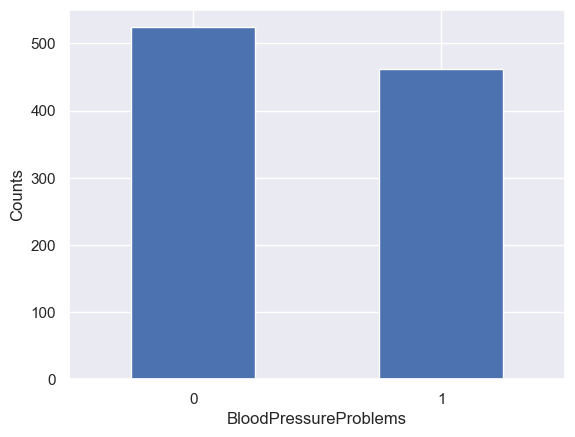

In [16]:
sns.set() 
plot = AbsFreq_blood.plot.bar(xlabel='BloodPressureProblems',ylabel='Counts', rot = 0)

De nuevo, esta representación gráfica de las frequencias absolutas nos vuelve a confirmar lo que ya habíamos comentado antes. Es decir, que el número de no afectados por problemas de presión sanguínea es mayor que el de afectados, con una diferencia todavía menor que en caso de `Diabetes` (62 observaciones frente a 158 observaciones).

Tras haber evaluado simplemente dos variables cualitativas, parece que la tendencia del conjunto de datos tiende a contener mayor número de pacientes sanos (Al menos en cuanto a ser diabéticos y padecer problemas de presión sanguínea) que de pacientes enfermos u afectados por algun tipo de afectación sanitaria. Además, y en relación a estas dos variables, esta conclusión parece tener sentido pues aquellos exite un mayor riesgo de hipertensión en personas diagnosticadas con diabetes. Por tanto, todas aquellas observaciones de pacientes no diabéticos, tengan probablemente asociado un valor 0 en la variable `BloodPressureProblems`.

### Variable `AnyTransplants` (cualitativa/factor/categoría)
##### Tablas de frequencia
De igual manera que con el resto de variables de tipo factor, procedo a realizar una tabla que reúne las frecuencias absolutas y relativas.

In [17]:
AbsFreq_trans = df['AnyTransplants'].value_counts().sort_index()
RelFreq_trans = df['AnyTransplants'].value_counts(normalize=True).sort_index() 

freqTable = pd.DataFrame({'Frec_Absolutas':AbsFreq_trans, 
                          'Frec_Relativas':RelFreq_trans})
print("Tabla de frecuencias absolutas y relativas: \n",freqTable)

Tabla de frecuencias absolutas y relativas: 
                 Frec_Absolutas  Frec_Relativas
AnyTransplants                                
0                          931        0.944219
1                           55        0.055781


En este caso, la variable 'AnyTransplants' está claramente desbalanceada. Un 94% de las observaciones no ha tenido ningún transplante. Esta observación es crítica, ya que trabajar con variables desbalanceadas puede llegar a crear problemas a la hora de modelizar o intentar predecir la variable de salida.

##### Gráficas
De nuevo al tratarse de una variable factor, para obtener una representación gráfica de la variable cualitativa `AnyTransplants`, vamos a realizar un gráfico de barras.

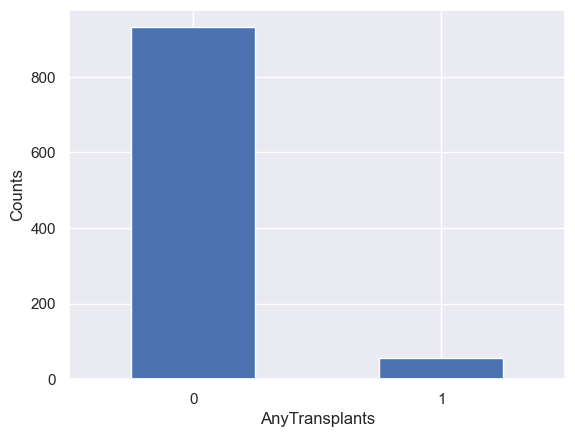

In [18]:
sns.set() 
plot = AbsFreq_trans.plot.bar(xlabel='AnyTransplants',ylabel='Counts', rot = 0)

La gráfica nos muestra lo mencionado anteriormente, hay muchas más observaciones con la variable 'AnyTransplants' con valor 0 que con 1. Esto tiene sentido, ya que la mayoría de la población no ha recibido ningún transplante, pero es importante tenerlo en cuenta.

### Variable `AnyChronicDiseases` (cualitativa/factor/categoría)
##### Tablas de frequencia
De igual manera que con el resto de variables de tipo factor, procedo a realizar una tabla que reúne las frecuencias absolutas y relativas.

In [19]:
AbsFreq_chron = df['AnyChronicDiseases'].value_counts().sort_index() 
RelFreq_chron = df['AnyChronicDiseases'].value_counts(normalize=True).sort_index() 

freqTable = pd.DataFrame({'Frec_Absolutas':AbsFreq_chron, 
                          'Frec_Relativas':RelFreq_chron})
print("Tabla de frecuencias absolutas y relativas: \n",freqTable)

Tabla de frecuencias absolutas y relativas: 
                     Frec_Absolutas  Frec_Relativas
AnyChronicDiseases                                
0                              808        0.819473
1                              178        0.180527


Análogamente a `AnyTransplants`, esta variable está claramente desbalanceada, aunque no tanto como la anterior. Hay que tener cuidado con estas variables y tenerlas en cuenta para proximos análisis.

##### Gráficas
De nuevo al tratarse de una variable factor, para obtener una representación gráfica de la variable cualitativa `AnyChronicDiseases`, vamos a realizar un gráfico de barras.

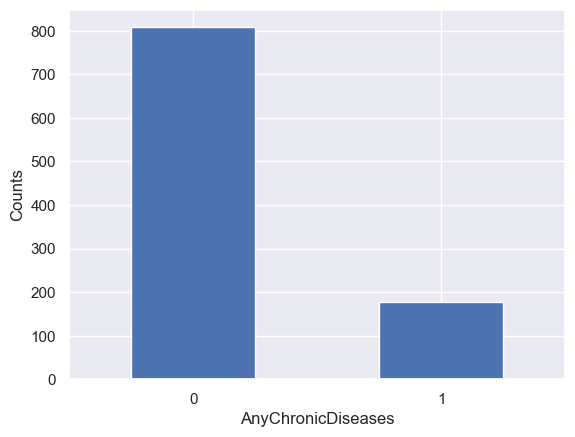

In [20]:
sns.set() 
plot = AbsFreq_chron.plot.bar(xlabel='AnyChronicDiseases',ylabel='Counts', rot = 0)

Lo dicho anteriormente, no está tan desbalanceada, ya que estamos hablando de un 82% de las observaciones, pero hay que tenerlo en cuenta. Tiene sentido el desbalanceo, ya que, la mayoría de la población no padece ninguna enfermedad crónica.

### Variables `Height` y `Weight` (numérica discreta)
Con estas variables vamos a proceder al igual que con la variable `Age`.

In [21]:
print(df[['Height', 'Weight']].describe()) 
print("La mediana de Height es: ",np.median(df['Height']), "y la de Weigth es ", np.median(df['Weight'])) # Medianas
print("Los cuatiles (primer, segundo y tercer) de Heigth son: ",np.quantile(df['Height'],[0.25,0.50,0.75])) # Cuartiles
print("Los cuatiles (primer, segundo y tercer) de Weigth son: ",np.quantile(df['Weight'],[0.25,0.50,0.75])) # Cuartiles
print("La desviación típica de Height es: ",np.std(df.Height)) 
print("La desviación típica de Weight es: ",np.std(df.Weight)) 

           Height      Weight
count  986.000000  986.000000
mean   168.182556   76.950304
std     10.098155   14.265096
min    145.000000   51.000000
25%    161.000000   67.000000
50%    168.000000   75.000000
75%    176.000000   87.000000
max    188.000000  132.000000
La mediana de Height es:  168.0 y la de Weigth es  75.0
Los cuatiles (primer, segundo y tercer) de Heigth son:  [161. 168. 176.]
Los cuatiles (primer, segundo y tercer) de Weigth son:  [67. 75. 87.]
La desviación típica de Height es:  10.093032760458255
La desviación típica de Weight es:  14.257860182598714


+ Tenemos que la variable `Height` está bastante bien distribuida, una media de 168cm y una mediana similar. Lo que indica que la distribución no contiene grandes outliers. Esto ultimo se puede ver también fijandose en el valor mínimo y máximo de la variable, que no se alejan extremadamente de la media. 

+ En cuanto a la variable `Weight`, la mediana y la media son también bastante similares. Tenemos un máximo de 132kg, lo que es claramente un outlier, ya que supera por mucho las 1,5 std por encima de la mediana, en cambio, el mínimo no es un gran outlier.

##### Gráficas

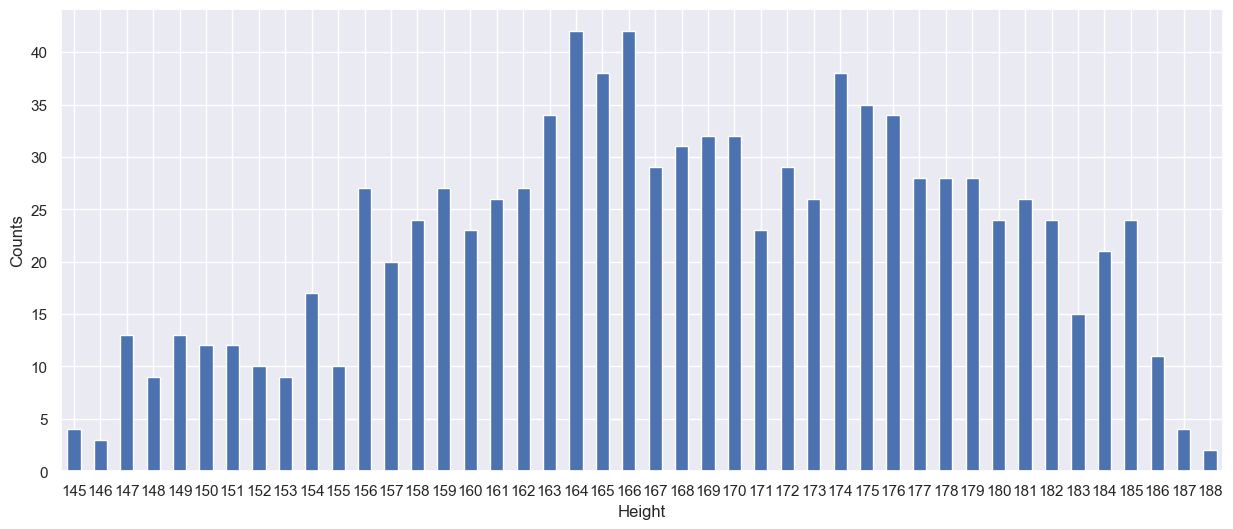

In [22]:
sns.set() 
plt.figure(figsize=(15, 6)) 
AbsFreq_Age = df['Height'].value_counts().sort_index()   
AbsFreq_Age
plot = AbsFreq_Age.plot.bar(xlabel='Height',ylabel='Counts',rot=0)
plt.show()

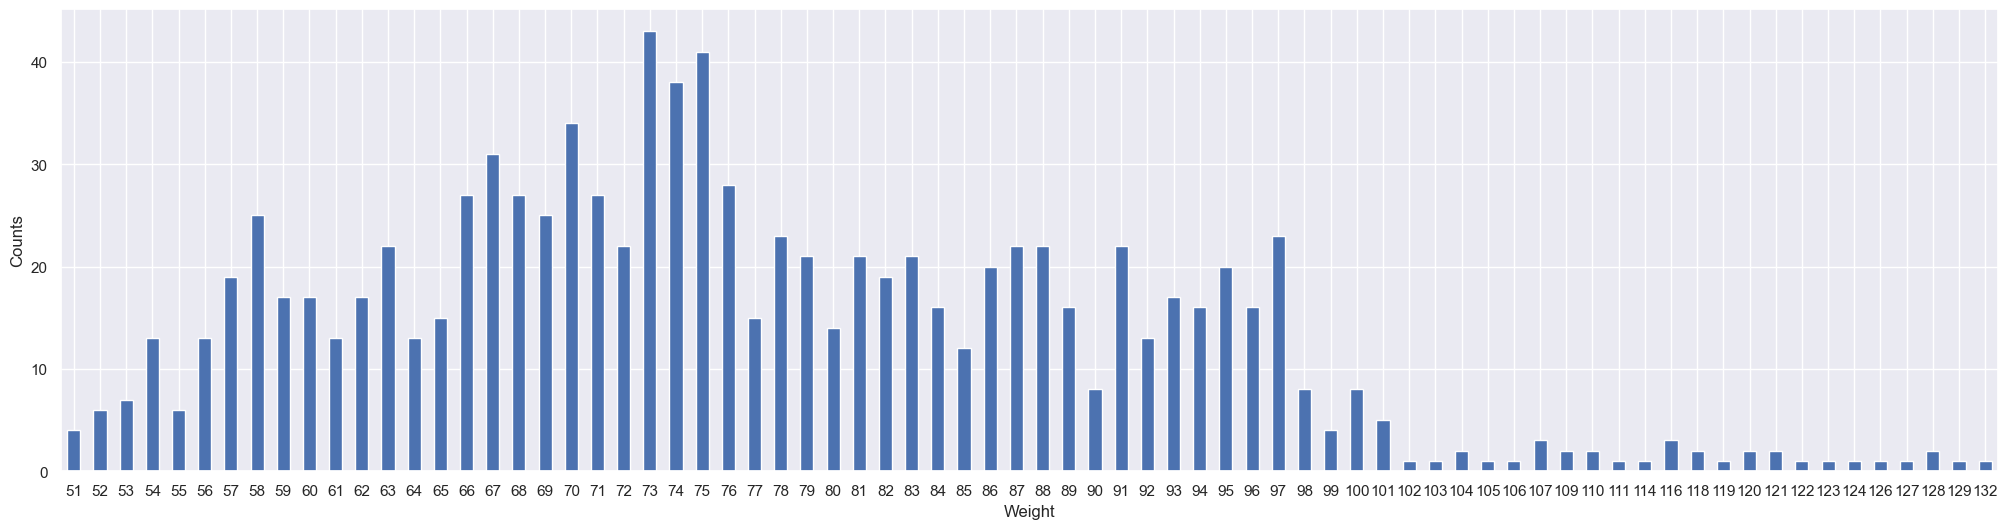

In [23]:
sns.set()
plt.figure(figsize=(25, 6)) 
AbsFreq_Age = df['Weight'].value_counts().sort_index()  
AbsFreq_Age
plot = AbsFreq_Age.plot.bar(xlabel='Weight',ylabel='Counts',rot=0)
plt.show()

Al tomar tantos valores distintos cada una de las variables, lo mejor es agruparlas por intervalos o realizar un histograma. En este caso con un histograma nos vale, aunque puede ser interesante crear nuevas variables con los intervalos de altura y peso a los que pertenecen cada una de las observaciones. Al igual que con la variable `Age` estas dos variables se pueden llegar a considerar continuas dependiendo del número de observaciones que tengamos y como queramos trabajar con ellas.

<Axes: xlabel='Height', ylabel='Frequency'>

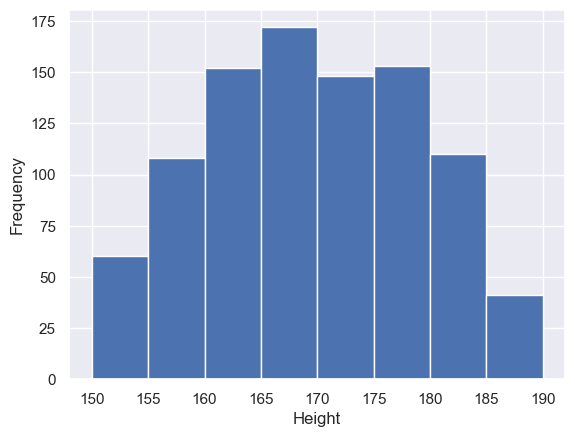

In [24]:
df['Height'].plot(kind='hist', xlabel='Height', bins =[150, 155, 160, 165, 170, 175, 180, 185, 190])

<Axes: xlabel='Weight', ylabel='Frequency'>

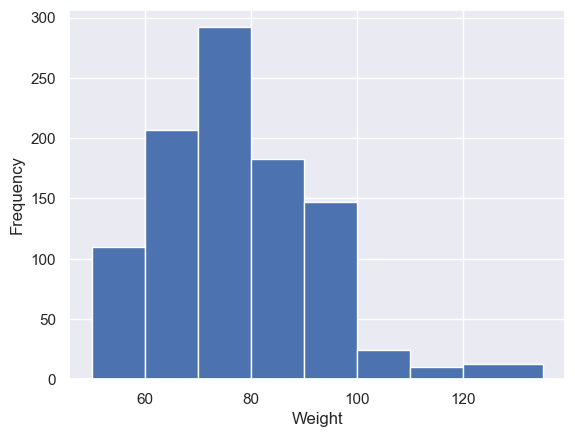

In [25]:
df['Weight'].plot(kind='hist', xlabel='Weight', bins =[50, 60, 70, 80, 90, 100, 110, 120, 135])

Podemos ver como ambas variables siguen una distribución bastante normal. Aunque, la variable `Weight` esta sesgada a la derecha.

Además, de las anteriores gráficas, los boxplots son bastante orientativos de cara a outliers y la distribución de las observaciones de cara a la mediana.

<Axes: xlabel='Height'>

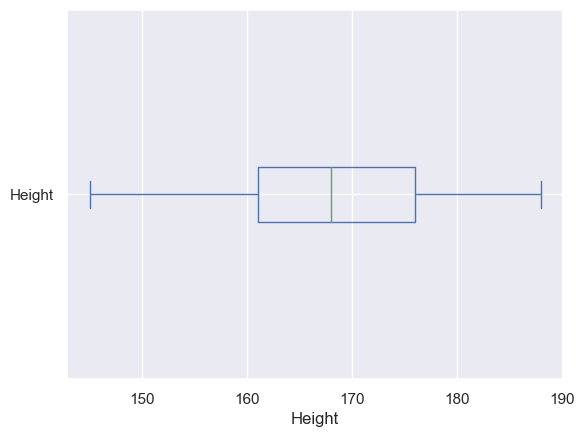

In [26]:
df['Height'].plot(kind='box', xlabel='Height', vert=False)

<Axes: xlabel='Weight'>

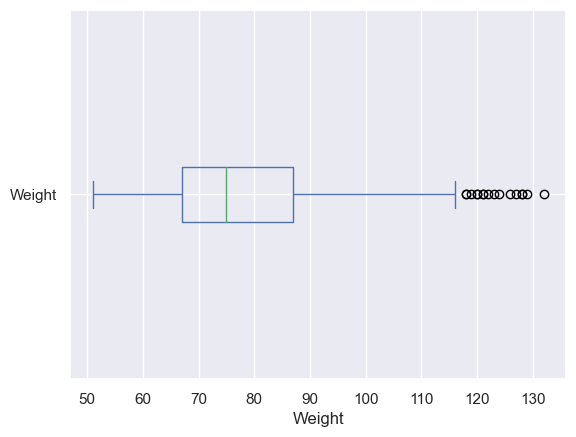

In [27]:
df['Weight'].plot(kind='box', xlabel='Weight', vert=False)

Al contrario que con `Height` la variable `Weight` si que contiene varios outliers que habrá que tener en cuenta para los posibles modelos que se realizen.


A continuación vamos a ver como se podrían agrupar en intervalos y asi podremos obtener las tablas de frecuencias.

In [28]:
df['HeightGroup'] = pd.cut(df['Height'], bins =[150, 155, 160, 165, 170, 175, 180, 185, 190])
df['WeightGroup'] = pd.cut(df['Weight'], bins =[50, 60, 70, 80, 90, 100, 110, 120, 135])

In [29]:
AbsFreq_HeightGroup = df['HeightGroup'].value_counts().sort_index()
RelFreq_HeightGroup = df['HeightGroup'].value_counts(normalize=True).sort_index()
freqTable = pd.DataFrame({'Frec_Absolutas':AbsFreq_HeightGroup, 
                          'Frec_Relativas':RelFreq_HeightGroup})
print("Tabla de frecuencias absolutas y relativas: \n",freqTable)

Tabla de frecuencias absolutas y relativas: 
              Frec_Absolutas  Frec_Relativas
HeightGroup                                
(150, 155]               58        0.062232
(155, 160]              121        0.129828
(160, 165]              167        0.179185
(165, 170]              166        0.178112
(170, 175]              151        0.162017
(175, 180]              142        0.152361
(180, 185]              110        0.118026
(185, 190]               17        0.018240


In [30]:
AbsFreq_WeightGroup = df['WeightGroup'].value_counts().sort_index()
RelFreq_WeightGroup = df['WeightGroup'].value_counts(normalize=True).sort_index()
freqTable = pd.DataFrame({'Frec_Absolutas':AbsFreq_WeightGroup, 
                          'Frec_Relativas':RelFreq_WeightGroup})
print("Tabla de frecuencias absolutas y relativas: \n",freqTable)

Tabla de frecuencias absolutas y relativas: 
              Frec_Absolutas  Frec_Relativas
WeightGroup                                
(50, 60]                127        0.128803
(60, 70]                224        0.227181
(70, 80]                272        0.275862
(80, 90]                177        0.179513
(90, 100]               147        0.149087
(100, 110]               18        0.018256
(110, 120]               10        0.010142
(120, 135]               11        0.011156


### Variable `KnownAllergies` (cualitativa/factor/categoría)
##### Tablas de frequencia
De igual manera que con el resto de variables de tipo factor, procedo a realizar una tabla que reúne las frecuencias absolutas y relativas.

In [31]:
AbsFreq_allergies = df['KnownAllergies'].value_counts().sort_index() #Frequencia absoluta ordenada por tamaño
RelFreq_allergies = df['KnownAllergies'].value_counts(normalize=True).sort_index() #Frequencia relativa ordenada por tamaño

frecuencias_allergies = pd.DataFrame({ 'Frec_Absolutas': AbsFreq_allergies,
                            'Frec_Relativas': RelFreq_allergies })

print("Tabla de frequencias KnownAllergies:")
print(frecuencias_allergies)

Tabla de frequencias KnownAllergies:
                Frec_Absolutas  Frec_Relativas
KnownAllergies                                
0                          774         0.78499
1                          212         0.21501


En base a las frecuencias obtenidas, podemos afirmar que hay más pacientes sin alergias conocidas que  con alergias conocidas. Estos suponen un 78,5% de los usuarios registrados.

##### Gráficos
De nuevo, al tratarse de una variable factor, para obtener una representación gráfica de la variable cualitativa KnownAllergies, vamos a realizar un gráfico de barras.

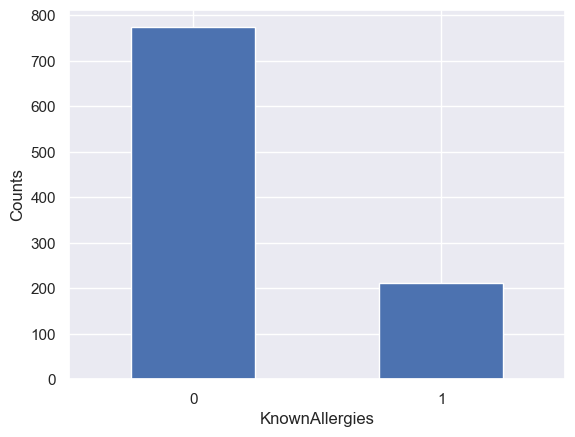

In [32]:
sns.set() 
plot = AbsFreq_allergies.plot.bar(xlabel='KnownAllergies',ylabel='Counts', rot = 0)

### Variable `HistoryOfCancerInFamily` (cualitativa/factor/categoría)
##### Tablas de frequencia
Empiezo obteniendo una tabla con las frecuencias absolutas y relativas de esta variable, con el objetivo de  averiguar qué clase es la mayoritaria en el conjunto de datos.

In [33]:
AbsFreq_cancer = df['HistoryOfCancerInFamily'].value_counts().sort_index() #Frequencia absoluta ordenada por tamaño
RelFreq_cancer = df['HistoryOfCancerInFamily'].value_counts(normalize=True).sort_index() #Frequencia relativa ordenada por tamaño

frecuencias_cancer = pd.DataFrame({ 'Frec_Absolutas': AbsFreq_cancer,
                            'Frec_Relativas': RelFreq_cancer })

print("Tabla de frequencias KnownAllergies:")
print(frecuencias_cancer)

Tabla de frequencias KnownAllergies:
                         Frec_Absolutas  Frec_Relativas
HistoryOfCancerInFamily                                
0                                   870        0.882353
1                                   116        0.117647


En base a las frecuencias obtenidas, podemos afirmar que hay más pacientes sin antecedentes en  su  familia de cáncer previo que pacientes con historial de cáncer familiar. En concreto, estos suponen un 88,2% de los usuarios registrados, es decir, en términos absolutos, 870 pacientes.

##### Gráficos
De nuevo, al tratarse de una variable factor, para obtener una representación gráfica de la variable cualitativa HistoryOfCancerInFamily, vamos a realizar un gráfico de barras.

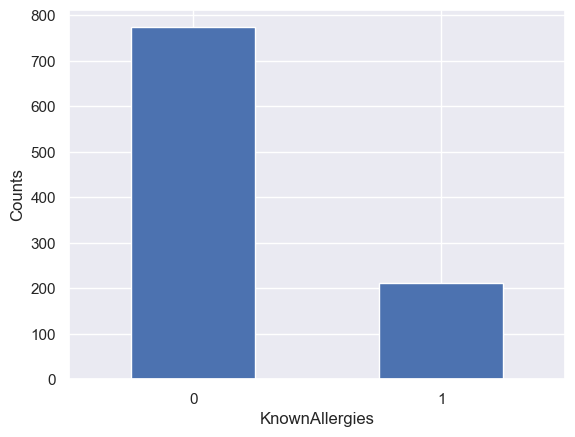

In [34]:
sns.set() 
plot = AbsFreq_allergies.plot.bar(xlabel='KnownAllergies',ylabel='Counts', rot = 0)

### Variable `NumberOfMajorSurgeries` (numérica entera)
##### Tablas de frequencia
Al igual que cuando estamos ante variables de tipo factor, ante esta variable relativa al número de cirugías mayores, comenzamos averiguando qué cantidad es la mayoritaria entre los pacientes de nuestro dataset y en  qué medida.

No obstante, a diferencia de cuando estamos trabajando con una variable de tipo factor, aquí sí que tiene sentido calcular las frecuencias acumuladas (tanto absolutas como relativas), pues sí que existe un componente de cantidad.


In [35]:
AbsFreq_cirugia = df['NumberOfMajorSurgeries'].value_counts().sort_index() #Frequencia absoluta ordenada por tamaño
RelFreq_cirugia = df['NumberOfMajorSurgeries'].value_counts(normalize=True).sort_index() #Frequencia relativa ordenada por tamaño
AbsFreqcum_cirugia = df['NumberOfMajorSurgeries'].value_counts().sort_index().cumsum()
RelFreqcum_cirugia = df['NumberOfMajorSurgeries'].value_counts(normalize=True).sort_index().cumsum()

frecuencias_cirugia = pd.DataFrame({ 'Frec_Absolutas': AbsFreq_cirugia,
                            'Frec_Relativas': RelFreq_cirugia,
                                   'Frec_Abs_Acum': AbsFreqcum_cirugia,
                            'Frec_Rel_Acum': RelFreqcum_cirugia})

print("Tabla de frequencias NumberOfMajorSurgeries:")
print(frecuencias_cirugia)

Tabla de frequencias NumberOfMajorSurgeries:
                        Frec_Absolutas  Frec_Relativas  Frec_Abs_Acum  \
NumberOfMajorSurgeries                                                  
0                                  479        0.485801            479   
1                                  372        0.377282            851   
2                                  119        0.120690            970   
3                                   16        0.016227            986   

                        Frec_Rel_Acum  
NumberOfMajorSurgeries                 
0                            0.485801  
1                            0.863083  
2                            0.983773  
3                            1.000000  


A partir de la tabla de frecuencias obtenidas, podemos extraer ciertas conclusiones:
- El número de cirugías mayores más habitual es haber tenido 0 cirugías, seguido de 1 única cirugía, 2 cirugías y siendo 3 cirugías algo excepcional en el conjunto de datos.

- El 48,6% de los usuarios no ha sido operado hasta el momento, el 37,7% ha sido operado 1 única vez. En cambio, en el otro extremo descubrimos que el 1,6%  ha recibido 3 cirugías hasta  el momento.

##### Gráficos
Seguimos el análisis de la variable con una representación gráfica.
Para representar una variable numérica discreta, recurrimos a un gráfico de barras donde representaremos las frecuencias absolutas de la variable.


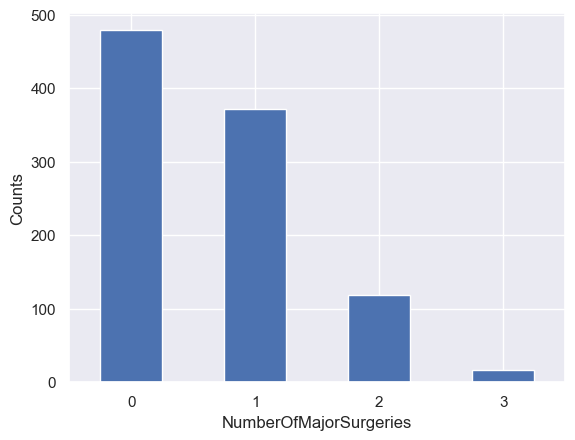

In [36]:
sns.set() 
plot = AbsFreq_cirugia.plot.bar(xlabel='NumberOfMajorSurgeries',ylabel='Counts', rot = 0)

### Variable `PremiumPrice` (numérica continua)
A diferencia de las variables discretas o de tipo categórico, a la hora de averiguar la distribución de una variable continua, carece de sentido averiguar cuántas veces se repite cada uno de los valores (obteniendo tablas de frecuencia, por ejemplo).

En cambio, para poder extraer conclusiones acerca de su ddistribución o qué intervalo de valores es más común en el conjunto de datos, podemos:
1) comenzar con una descripción de sus medidas de centralidad y dispersión,

2) representar la curva de densidad de la variable, así como su histograma,

3) representar un  boxplot e identificar valores atípicos


##### Medidas de centralidad y dispersión
Para obtener esta descripción estadística de la variable, voy a emplear el método `describe()`que obtiene automáticamente la media, desviación típica, valores mínimo y máximo y cuartiles.

In [37]:
df['PremiumPrice'].describe()

count      986.000000
mean     24336.713996
std       6248.184382
min      15000.000000
25%      21000.000000
50%      23000.000000
75%      28000.000000
max      40000.000000
Name: PremiumPrice, dtype: float64

- Se observa que del total de 986 registros, el precio medio de las primas es de 24337 uds monetarias.

- Si comparamos este valor medio con la mediana (percentil 50%), observamos que la mediana es ligeramente inferior (23000). De esta comparación extraemos que la variable del precio de la prima debe de tener algunos valores atípicamente altos que hacen que la media, medida de centralidad susceptible a outliers, se eleve frente a la mediana.

- En cuanto a medidas de dispersión, la desviación típica es de 6248 uds monetarias.

- El precio mínimo de una prima es igual a 15000 uds monetarias, y el precio máximo es de 40000.

##### Curvas de densidad e histogramas
Para continuar, representaré gráficamente esta variable.
Para ello, comenzaré con una curva de densidad, a la cual complementaré con un histograma.

Los histogramas son gráficos típicos de las variables continuas, pero que establecen intervalos para la variable. Podríamos dejar los inntervalos que el programa establezca por defecto, pero como los valores de mueven entre 15000 y 40000, especificaremos que buscamos 10 intervalos (1 cada 2500 uds).



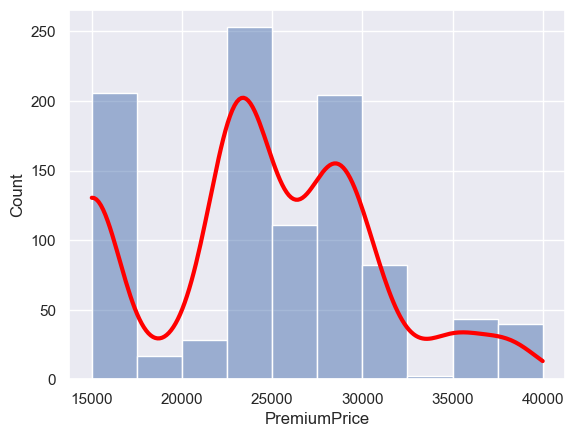

In [38]:
dens_plot = sns.histplot(data = df, x = 'PremiumPrice', kde=True, bins = 10)  #kde por la curva de densidad
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)

La distribución obtenida para esta variable es algo particular:
- No tiene ninguna tendencia clara, de hecho, va subiendo y bajando a medida que nos movemos por el eje x.
- El intervalo de precios de prima más repetido es el precio de 22500 a 25000 uds monetarias, seguido del intervalo comprendido entre los 27500 y 30000 uds monetarias, y el intervalo de precios más bajo de 15000 a 17500 uds monetarias.
- Sí  que se observa que, una vez sobrepasamos los 30000 euros de precio de prima, va disminuyendo la frecuencia de precios más elevados.

##### Boxplot y valores atípicos
Finalmente, para terminar con el análisis de la variable, procedo a representar su boxplot.

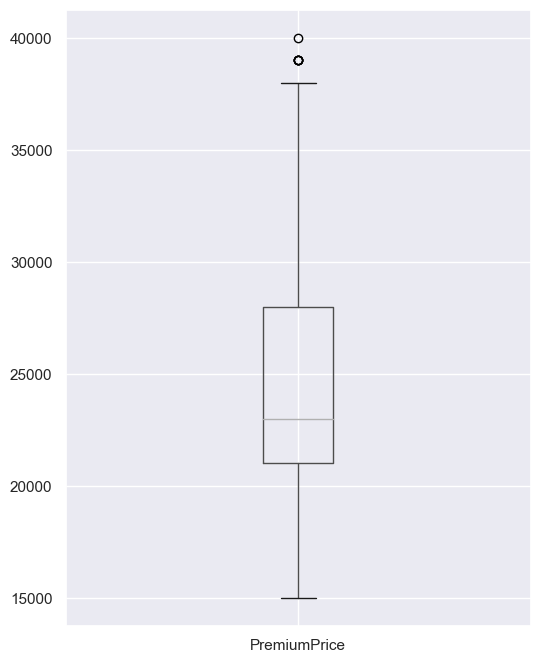

In [39]:
getPlot = df.boxplot(column='PremiumPrice', figsize=(6, 8))

Como ya se adelantaba anteriormente en la comparación de la media y la mediana, existen valores de precios de prima atípicamente altos.

Los identificamos con el siguiente código:

Como se observa, los 6 valores atípicamente altos para la variable del precio de la prima, se corresponden con aquellos precios iguales a 39000 y 40000 uds monetarias.

In [40]:
col_iqr = stats.iqr(df.PremiumPrice)
col_q1, col_q3 = np.quantile(df.PremiumPrice, [0.25, 0.75])
cut_low = col_q1 - 1.5 * col_iqr
cut_high = col_q3 + 1.5 * col_iqr
col_outliers = df.loc[(df.PremiumPrice < cut_low) | (df.PremiumPrice > cut_high)]
print('There are the following number of outliers:', len(col_outliers))
print("These outliers are:")
col_outliers

There are the following number of outliers: 6
These outliers are:


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,AgeGroup,HeightGroup,WeightGroup
204,27,0,1,0,0,159,120,1,1,1,39000,"(20, 40]","(155, 160]","(110, 120]"
295,64,1,1,0,1,163,91,0,0,2,40000,"(60, 80]","(160, 165]","(90, 100]"
926,24,0,1,0,0,159,67,0,0,0,39000,"(20, 40]","(155, 160]","(60, 70]"
928,19,0,0,0,0,171,67,0,0,1,39000,"(0, 20]","(170, 175]","(60, 70]"
976,21,0,1,0,0,155,74,0,0,0,39000,"(20, 40]","(150, 155]","(70, 80]"
984,47,1,1,0,0,158,73,1,0,1,39000,"(40, 60]","(155, 160]","(70, 80]"


## Relaciones entre variables

El análisis exploratorio lo continuamos con el estudio de las relaciones entre las diferentes variables del conjunto de datos. 

En concreto, vamos a analizar algunas relaciones que consideramos que pueden ser relevantes en este caso.

Hemos decidido no realizar u pairplot para graficar todas las relaciones entre todas las variables pues la cantidad de variables es muy grande, y carecería de interpretación la gráfica obtenida.

#### AnyChronicDiseases ~ PremiumPrice

En primer lugar, vamos a estudiar la relación entre la variable de tipo factor relativa a si el usuario tiene alguna enfermedad crónica y el precio de la prima del seguro (numérica).

Suponemos que ante la existencia de alguna enfermedad crónica, el precio será superior.

Para esta relación, podemos emplear boxplots sobre el precio de la prima, uno para aquellos usuarios con enfermedad crónica, y otro para los que no.

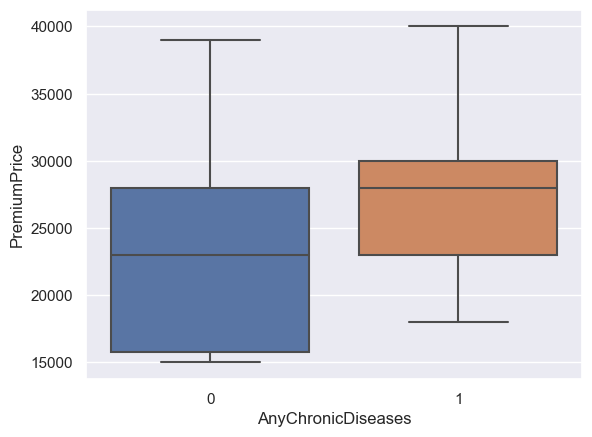

In [41]:
class_order_by_acd = list(df[['PremiumPrice', 'AnyChronicDiseases']].groupby('AnyChronicDiseases').median().sort_values('PremiumPrice').index)

sns.boxplot(x='AnyChronicDiseases', y='PremiumPrice', data=df, order=class_order_by_acd)
plt.show()

Efectivamente, como anticipábamos, el precio de la prima de las personas con alguna enfermedad crónica es superior.

La mediana en el precio de la prima entre personas con enfermedad crónica es de 28000 uds monetarias, frente a 23000 entre aquellos sin enfermedad crónica.


#### Diabetes ~ BloodPressureProblems

Las variables involucradas en esta relación resultan ser dos variables de tipo factor. Específicamente, se va a estudiar la relación entre la variable `Diabetes` relativa a si el paciente padece de diabetes y `BloodPressureProblems`, la cual indica si el paciente padece de problemas de presión sanguínea.

En primera intstancia, nuestro primer pensamiento es suponer que estas variables están altamente relacionadas, pues es sabido que la enfermedad de la diabetes hace que los vasos sanguíneos se endurezcan propiciando la alta presión arterial.

Al tratarse de una relación entre dos factores, se procede a realizar una tabla de contingencia. Además, en este caso dicha tabla es una buena aproximación daod que los factores tienen un número moderado de niveles (son binarios).

El obtener una tabla de contingencia entre dos variables (2x2) es sencillo utilizando la función crosstab de Pandas. Dicha función recibe como argumentos las dos variables a considerar (filas, columnas). De manera opcional se especifica también el argumento margins para determinar que se muestren los subtotales por filas y columnas. Además, se crea una segunda tabla de contingencia en las que se muestran las probabilidades marginales al especificar el argumento `normalize`. Dichas probabilidades nos permitirán conocer las probabilidades de eventos individuales en la tabla de contingencia. 

In [42]:
## Tabla de contingencia
CT = pd.crosstab(df['Diabetes'], df['BloodPressureProblems'],margins=True)
print('Tabla de contingencia que muestra la correlación entre pacientes con diabetes y pacientes con problemas de presión sanguínea: \n')
CT

Tabla de contingencia que muestra la correlación entre pacientes con diabetes y pacientes con problemas de presión sanguínea: 



BloodPressureProblems,0,1,All
Diabetes,,,
0,335,237,572
1,189,225,414
All,524,462,986


In [43]:
CT_marg = pd.crosstab(df['Diabetes'], df['BloodPressureProblems'],margins=True,normalize=True)
print('\n')
print('Tabla de contingencia que muestra la correlación entre pacientes con diabetes y pacientes con problemas de presión sanguínea(con probabilidades marginales): \n')
CT_marg



Tabla de contingencia que muestra la correlación entre pacientes con diabetes y pacientes con problemas de presión sanguínea(con probabilidades marginales): 



BloodPressureProblems,0,1,All
Diabetes,,,
0,0.339757,0.240365,0.580122
1,0.191684,0.228195,0.419878
All,0.531440,0.468560,1.000000


Una vez obtenida la tabla de contingencia para analizar y registrar la relacion entre ambas variables de naturaleza cualitativa, se observa como estas tablas se caracterizan porque en sus celdas figuran probabilidades, y en la cual podemos determinar unas probabilidades conociendo otras de la tabla.

Con el objetivo de computar algunas probabilidades condicionales que nos aporten una información adicional a la tabla de contingencia, se procede a calcular las siguientes probabilidades:
+ $P(diabético|problemas presión sanguínea)$
+ $P(problemas presión sanguínea|no diabético)$
+ $P(diabético)$ y $P(problemas presión sanguínea)$

Para resolver dichas probabilidades se acude a la definición formal de probabilidad condicionada $P(A|B)=\frac{P(A\cap B)}{P(B)}$. Al aplicar dicha definición a las probabilidades pedidas en el enunciado se tiene:
+ $P(diabético|problemas presión sanguínea)=\frac{P(diabético\cap problemas presión sanguínea)}{P(problemas presión sanguínea)}$ 
+ $P(problemas presión sanguínea|no diabético)=\frac{P(problemas presión sanguínea\cap no diabético)}{P(no diabético)}$ 
+ $P(diabético)$ y $P(problemas presión sanguínea)$

Estas probabilidades son facilmente obtenibles al haber computado las tablas de contingencia con probabilidades marginales en el apartado anterior. Por tanto, sólo hará falta hacer uso de dichas probabilidades para calcular las probabilidades condionadas pedidas en el enunciado

In [44]:
print('P(diabético|problemas presión sanguínea): ', CT_marg[1][1]/CT_marg[1]['All']) # En tabla contingencia se accede a posiciones por nombres columnas,filas
print('P(problemas presión sanguínea|no diabético): ', CT_marg[1][0]/CT_marg['All'][0])
print('P(diabético): ', CT_marg['All'][1])
print('P(𝑝𝑟𝑜𝑏𝑙𝑒𝑚𝑎𝑠𝑝𝑟𝑒𝑠𝑖ó𝑛𝑠𝑎𝑛𝑔𝑢í𝑛𝑒𝑎): ',  CT_marg[1]['All'])

P(diabético|problemas presión sanguínea):  0.48701298701298706
P(problemas presión sanguínea|no diabético):  0.4143356643356644
P(diabético):  0.4198782961460446
P(𝑝𝑟𝑜𝑏𝑙𝑒𝑚𝑎𝑠𝑝𝑟𝑒𝑠𝑖ó𝑛𝑠𝑎𝑛𝑔𝑢í𝑛𝑒𝑎):  0.4685598377281947


Para mostrar un análisis gráfico de la relación entre ambas variables, se realiza un diagrama de barras de la tabla de cotningencia obtenida

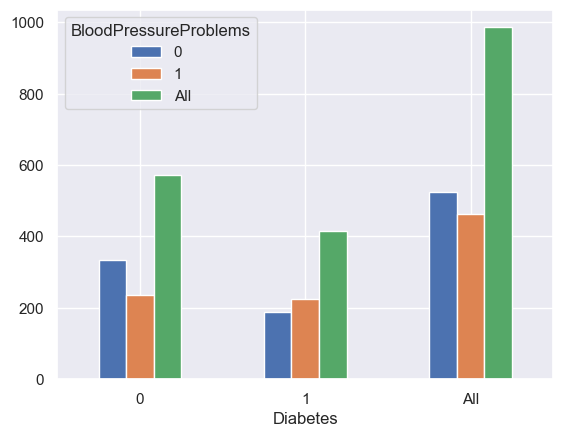

In [45]:
plot = CT.plot.bar(rot=0)

De igual forma, se procede a hacer un gráfico típico para estudiar la relación entre variables cualitativas conocido comod iagrama de barras apilado verticalmente. Adicionalmente, a este gráfico se le añadirán procentajes relacionados con una de las variables cualitativas

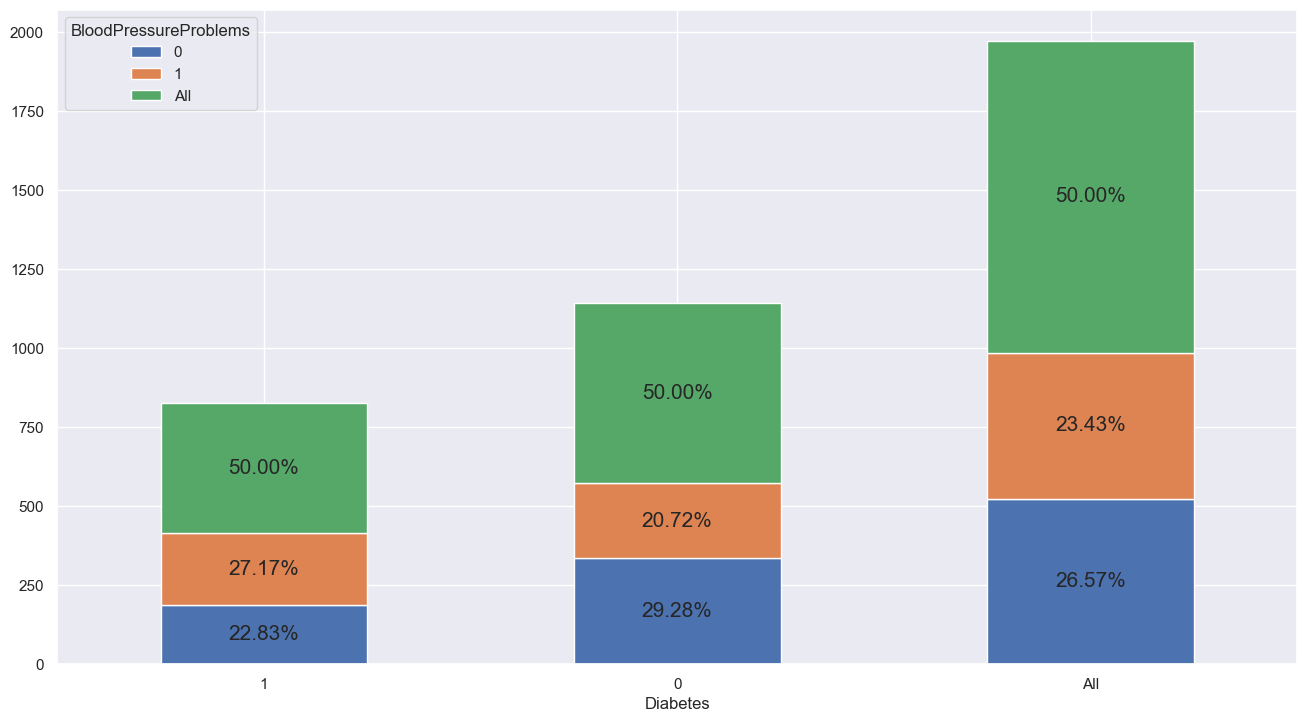

In [46]:
## Diagrama de barras apiladas verticalmente con porcentajes incluido
sns.set(rc={'figure.figsize':(16, 8.5)})
# We add to the table the totals for each row
CT['total'] = CT.sum(axis=1)
# Sort the table using those totals
CT.sort_values('total', inplace=True)
# Remove them so thay do not interfere with the graphic
CT2= CT.drop(columns='total')
percents = CT2.div(CT.total, axis = 0).mul(100).round(2)
percents.iloc[:, 0]
ax = CT2.plot.bar(stacked = True, rot = 0)
for i in range(len(ax.containers)):   
    c = ax.containers[i]  
    # percent labels (or empty string below a threshold for close to 0%)
    labels = [f'{v:2.2f}%' if (v > 1) else '' for v in percents.iloc[:, i]]  
    # add labels to bars
    ax.bar_label(c, labels=labels, label_type='center',   fontsize=15)
plt.show()  

Tras computar tanto la tabla de contingencia, las probabilidades condiconadas y el análisis gráfico de la misma, se puede observar como en general los los pacientes con diabetes tienden a tener más problemas de presión sanguínea. Efectivamente, con las probabilidades condicionadas se observa que la probabilidad de ser diabético y tener problemas de presión sanguínea (0,49) es mayor que la de tener problemas de presión sanguínea y no ser diabético (0,41).

Además podemos observar que existe una muy leve diferencia entre el número de pacientes no diabéticos con problemas de presión sanguínea y pacientes diabéticos que sí tienen problemas de presión sanguínea, teniendo ambos grupos proporción muy similar. Así mismo, la probabilidad de padecer problemas de presión sanguínea (0,47) es mayor que la de ser diabético (0,42). Aún así, ambas situaciones pueden deberse a que en la muestra existen personas con otro tipo de enfermedades o sobrepeso que pueden implicar estos problemas de presión sanguínea.

Por tanto, podrías confirmar nuestra teoría inicial de que ambas variables están relacionadas en la forma en que un paciente diabético tiene mayor probabilidad de padecer problemas de presión sanguínea.

#### Weight and Height ~ PremiumPrice

Los valores de peso y altura están íntimamente relacionados, debido a que cuanto más alta es una persona más peso tiene. Para unificar ambas variables vamos a añadir una nueva variable al conjunto de datos, el `BMI`. Nótese que el `BMI` está relacionado con el estado médico de una persona, por lo que podemos considerar correcto utilizarlo. También utilizaremos `.describe()` para ver cómo se distribuye la nueva variable.

In [47]:
df['BMI'] = df['Weight']/((df['Height']/100)**2)
df['BMI'].describe()

count    986.000000
mean      27.460709
std        5.878671
min       15.156281
25%       23.393392
50%       27.156602
75%       30.759870
max       50.000000
Name: BMI, dtype: float64

Tiene sentido pensar que el `BMI` pueda estar relacionado con el `PremiumPrice` de alguien. Al fin y al cabo, alguien con un `BMI` más alto tiene más probabilidades de sufrir problemas de corazón y otras enfermedades. Para comparar ambas variables vamos a representarlas gráficamente y ver cómo se distribuyen.

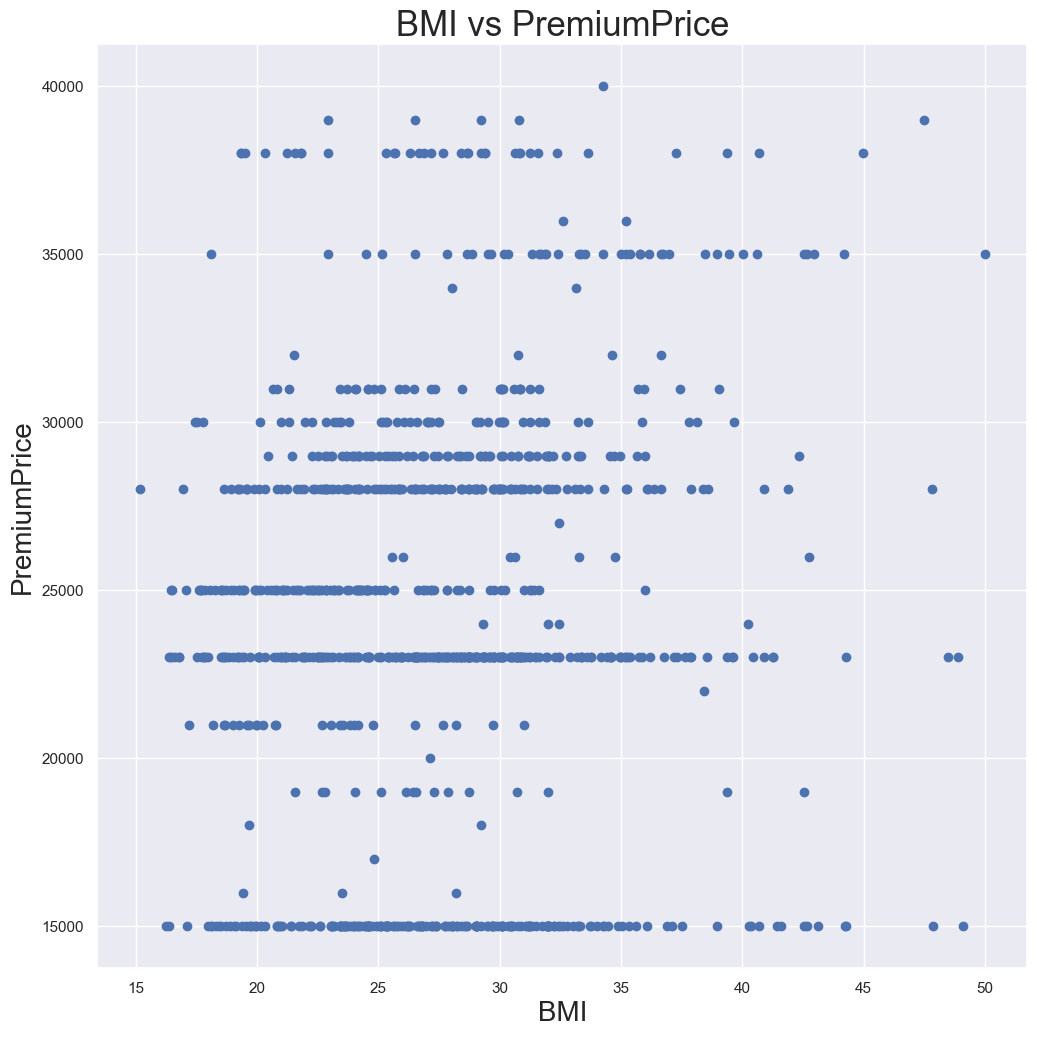

In [48]:
sns.set(rc={'figure.figsize':(12, 12)})
plt.plot('BMI', 'PremiumPrice', 'bo', data=df)
plt.xlabel('BMI', fontdict={'fontsize':20})    # cty y es el consumo en ciudad
plt.ylabel('PremiumPrice', fontdict={'fontsize':20})   # hwy es el consumo en carretera
plt.title('BMI vs PremiumPrice', fontdict={'fontsize':25})
plt.show()

Para casi todos los valores de `BMI` hay diferentes valores de `PremiumPrice`. Por lo tanto, a pesar de nuestra hipótesis inicial de que ambas variables están relacionadas, analizando el gráfico cabe pensar que son independientes. Cabe destacar que el `BMI` no es una medida perfecta para determinar si una persona tiene obesidad o no, ya que este solo relaciona el peso y la altura. Es decir, una persona cuyo peso sea alto únicamente por tener mucha masa muscular tendrá un `BMI` alto sin tener sobrepeso y estando sano.

Finalmente, como un punto adicional en este apartado, podemos representar todas las variables en función de la variable de salida `PremiumPrice`.

Cabe tener en cuenta que, al tener tantas variables en el conjunto de datos, vamos a obtener gráficos de un tamaño menor del deseado. 

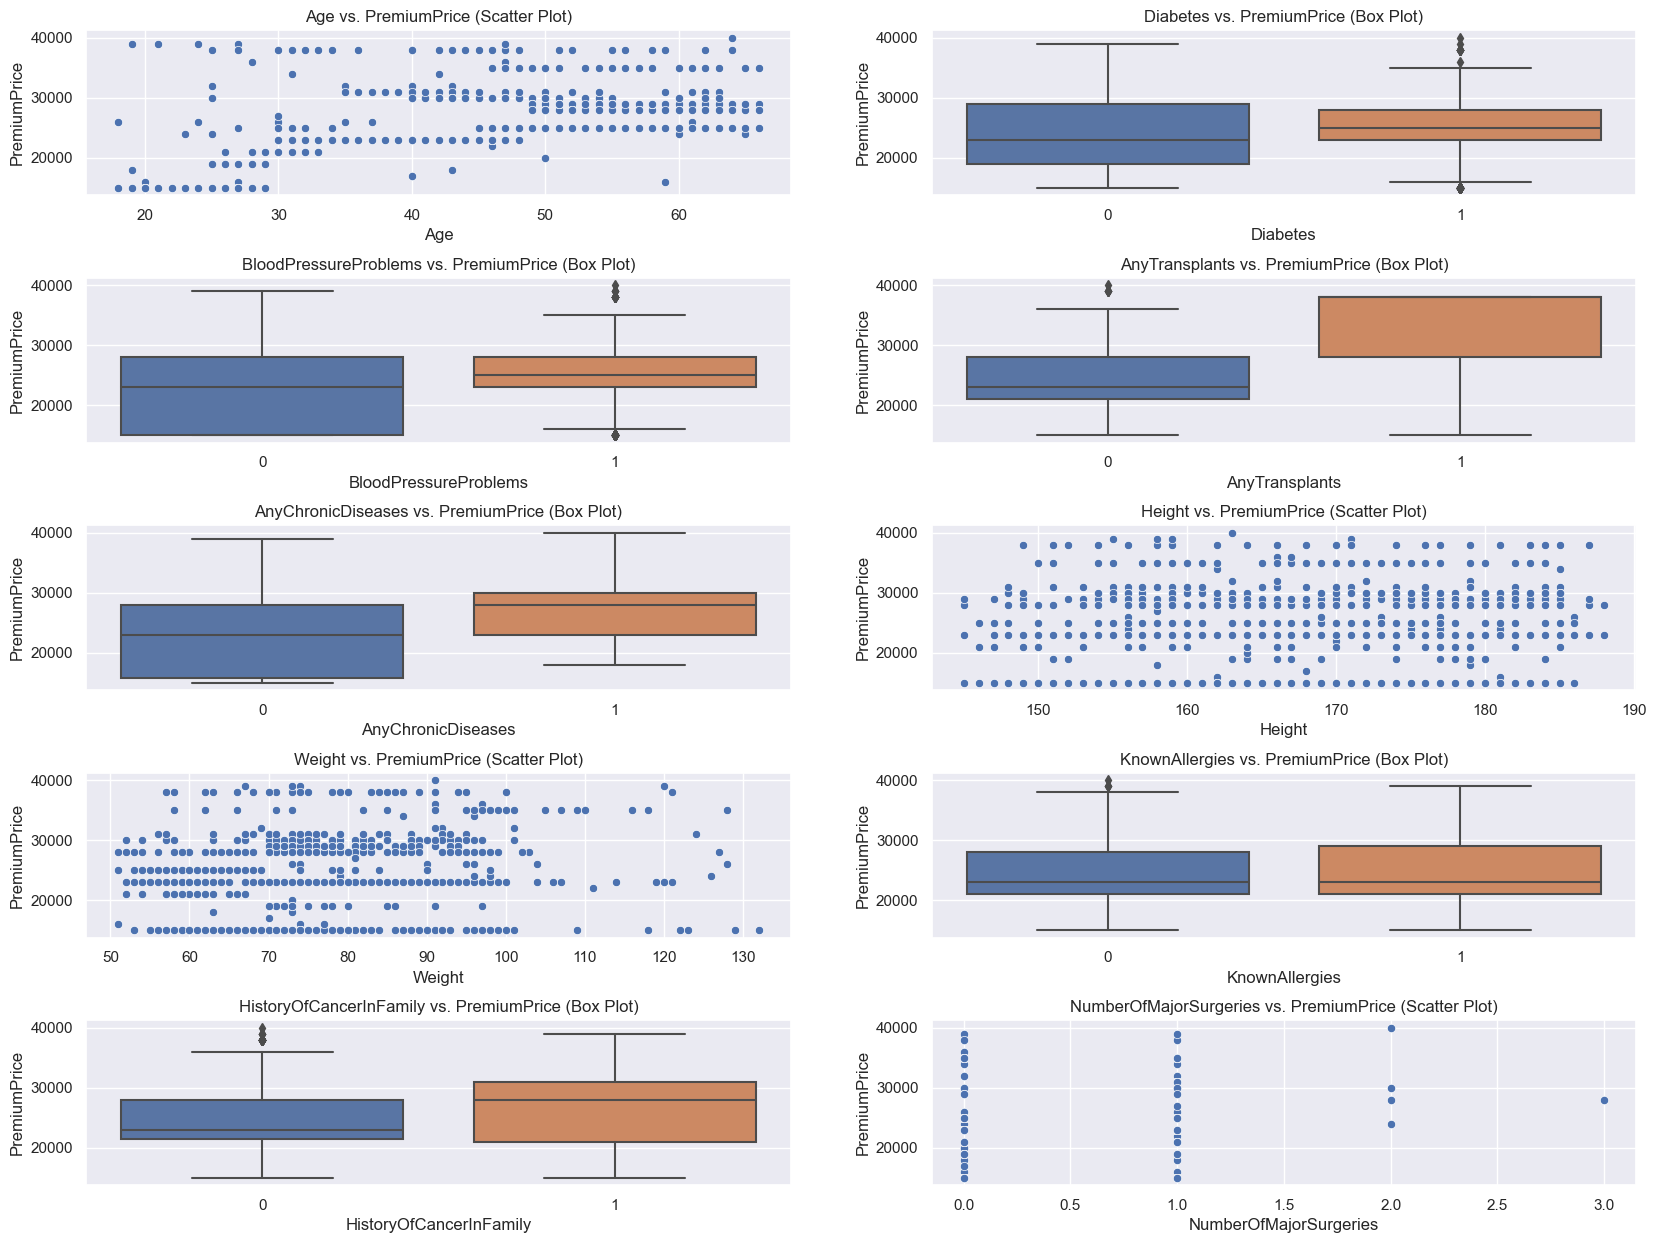

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes un DataFrame llamado 'df' con tus datos

# Lista de las variables predictoras (algunas son categóricas y otras numéricas)
variables_predictoras = ['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']
# Crear subgráficos para cada variable predictora
fig, axes = plt.subplots(5, 2, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5)

for i, variable in enumerate(variables_predictoras):
    row, col = i // 2, i % 2
    ax = axes[row, col]

    # Comprobar si la variable es categórica o numérica
    if df[variable].dtype == 'category':
        sns.boxplot(data=df, x=variable, y='PremiumPrice', ax=ax)
        ax.set_title(f'{variable} vs. PremiumPrice (Box Plot)')
    else:
        sns.scatterplot(data=df, x=variable, y='PremiumPrice', ax=ax)
        ax.set_title(f'{variable} vs. PremiumPrice (Scatter Plot)')

plt.show()


Efectivamente, observando el gráfico superior observamos la relación entre cada una de las variables explicativas con la variable de salida `PremiumPrice`. Tal y como se comentó anteriormente para la variable `BMI`, creada como combinación de las variables `Weight` y `Height`, se observa (ahora para cada una de las variables en vez de para `BMI`), que efectivamente no existe ninguna relación apreciable entre dichas variables y la variable de salida. Por otro lado, se observa como en general, personas con historia familiar de cáncer (`HistoryOfcancerInFamily`), pacientes con enfermedades crónicas (`AnyChronicDiseases`) o pacientes con problemas de presión sanguínea (`BloodPressureProblems`), tienen un valor de `PremiumPrice` mayor (por ejmplo, su mediana es mas alta) respecto a aquellos pacientes que no padecen ninguno de estos tipos.

## Modelo de regresión lineal:

Para finalizar, hemos decidido implementar un modelo de regresión lineal utilizando todas las variables de dataset como variables explicatorias de la variable de salida 'PremiumPrice'.

Bien es cierto que este sería tan solo un modelo inicial en el caso de estar ante una tarea de Machine Learning, pues es un modelo que únicamente captura relaciones lineales y, además, vamos a introducir todas las variables como inputs sean o no sean estadísticamente significativas.

In [49]:
inputs = ['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants','AnyChronicDiseases',
           'Height', 'Weight', 'KnownAllergies','HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'BMI']
X = df.loc[:,inputs]
Y = df.PremiumPrice

# Create the model
modelXY = LinearRegression(fit_intercept=True) 
XY_fit = modelXY.fit(X, Y)   #una vez tengo definido el modelo, lo hago

Una vez está entrenado el modelo, nos interesa conocer cuáles son los coeficientes de cada una de las variables explicatorias. Con estos coeficientes evidenciamos cómo por cada aumento de 1 unidad de cada una de las variables, la variable de salida aumenta o disminuye en la cantidad del coeficiente en cuestión.

Presentamos en una tabla los coeficientes del modelo:

In [50]:
variables_names = ['Intercept','Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
                   'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies','HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'BMI']
coefs = [13197.1, 329.28886264, -433.23817709,  169.82629052, 7908.05437763,
       2651.18906844,  -51.44246008,  118.92577029,  303.95173757,
       2325.39952014, -653.91735613, -139.33713995]

df_reg_line = pd.DataFrame({'Variables':variables_names, 
                          'Coeficientes':coefs})

df_reg_line

,Variables,Coeficientes
0,Intercept,13197.100000
1,Age,329.288863
2,Diabetes,-433.238177
3,BloodPressureProblems,169.826291
4,AnyTransplants,7908.054378
5,AnyChronicDiseases,2651.189068
6,Height,-51.442460
7,Weight,118.925770
8,KnownAllergies,303.951738
9,HistoryOfCancerInFamily,2325.399520


Podemos sacar conclusiones de estos coeficientes:

- Por ejemplo, de media cada aumento de 1 año en la edad del cliente, la prima del seguro se ve aumentada en 330 unidades económicas.
- En cambio, debido al signo positivo en sus coeficientes, el tener problemas de presión en sangre, transplantes, enfermedades crónicas o histórico de cáncer en la familia, hace que el precio de la prima del seguro aumente considerablemente.

No obstante, como se ha mencionado al inicio de este último apartado, esta regresión lineal necesitaría de la obtención de los p-valores para saber qué variables son más relevantes en el modelo, así como también sería conveniente entrenar otros modelos de regresión que probablemente funcionen mejor sobre el conjunto de datos.

## Conclusiones:

Tras la realización del proyecto completo acerca del dataset seleccionado `Medicalpremimum.csv`, podemos obtener una serie de conclusiones.

En primer lugar, respecto al Análisis Exploratorio inicial, concluimos que se trata de un conjunto de datos variado, con variables que abarcan todos los tipos posibles (numéricas continuas, numéricas discretas y cualitativas). Para cada uno de esas variables se realizó un análisis exploratorio completo de la manera adecuada según su tipo. Durante dicho análisis destaca la discretización en bins realizada para la variable `Age`, la cual pone de manifiesto el borroso límite entre variables cuantitativas continuas y discretas visto en clase. Así mismo, ocurría dicho fenómeno para las variables `Height` y `Weight`. Otro hecho destacable durante dicho análisis fue el estudio de la variable de salida en el conjunto de datos estudiado. Dicha variable `PremiumPrice` fue la única en la que se puso de manifiesto el estudio de una variable tipo continua. En dicho estudio, además se observaron ciertos valores atípicos excesivamente altos, que podrían relacionarse (tal y como se ha visto tras hacer el modelo de regresiónlineal) con pacientes que tenían ciertos antecedentes familiares, transplantes o más necesidades médicas por sus condiciones. 

Posteriormente, se procedió a estudiar la relación entre ciertas variables que en un inicio nos llamaron la atención por suponer que existiría una alta relación entre ellas. En cuanto a las variables de `Diabetes` y `BloodPressureProblems` concluimos que sí estaban altamente relacionadas como era de esperar. Sin embargo, tras entrenar el modelo de regresión nos dimos cuenta que la variable `Diabetes`, aunque estuviese muy relacionada con `BloodPressureProblems`, tenía un coeficiente mucho menos determinante en el modelo. Esto podría deberse a que como se comentó anteriormente, pueden existir un gran número de pacientes no diabéticos pero con problemas de presión sanguínea, por lo que no deberían pensarse como iguales, si no que la variable `BloodPressureProblems` debería acarrear un mayor valor del precio del seguro médico. Por otro lado, la inicial relación que se pensó entre la variable `BMI` y la de salida, no resultó ser cierta. 

Finalmente, y en cuanto al modelo de regresión lineal, hemos obtenido un resultado bastante esperado. Resulta que aquellos pacientes con mayor riesgo médico de algún tipo importante, tales como antecedentes de cáncer, transplantes, enfermedades crónicas o problemas de presión sanguínea, tienen un mayor precio de seguro. 